In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams['figure.figsize']=(20,10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read data

Load the Avocado dataset and create a dataframe. Convert the Date column to appropriate Date type object and set it as the index of the dataframe. Finally sort the dataframe by index.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mdrkb/avocado-prices/master/avocado_updated.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index()
print(f'Shape of the dataframe: {df.shape}')
df.head()

Shape of the dataframe: (29483, 13)


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise
2015-01-04,51,1.80,2057.29,1200.41,53.55,0.00,803.33,803.33,0.00,0.00,organic,2015,Orlando
2015-01-04,51,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22,conventional,2015,Plains
2015-01-04,51,1.83,7301.30,6.81,630.24,0.00,6664.25,6664.25,0.00,0.00,organic,2015,NorthernNewEngland
2015-01-04,51,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh


# Preprocessing and data exploration

## Drop unnecessary columns
We don't need the first column and the year column as we can easily extract year from the index. So, we'll remove these two columns.

In [ ]:
df.drop(['Unnamed: 0', 'year'], axis=1, inplace=True)

## Check for missing values
We can see that each column has 29483 non-null values. That means, there are no missing values in our dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29483 entries, 2015-01-04 to 2020-04-19
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  29483 non-null  float64
 1   Total Volume  29483 non-null  float64
 2   4046          29483 non-null  float64
 3   4225          29483 non-null  float64
 4   4770          29483 non-null  float64
 5   Total Bags    29483 non-null  float64
 6   Small Bags    29483 non-null  float64
 7   Large Bags    29483 non-null  float64
 8   XLarge Bags   29483 non-null  float64
 9   type          29483 non-null  object 
 10  region        29483 non-null  object 
dtypes: float64(9), object(2)
memory usage: 2.7+ MB


## Inspecting categorical variables
Here we have 2 Avocado type: Conventional and Organic.

In [ ]:
print('Avocado Region List:\n', df.region.unique())
print('-' * 50, '\n\nAvocado Type List:\n', df.type.unique())

Avocado Region List:
 ['Boise' 'Orlando' 'Plains' 'NorthernNewEngland' 'Pittsburgh' 'Northeast'
 'PhoenixTucson' 'NewYork' 'Philadelphia' 'NewOrleansMobile' 'Nashville'
 'Midsouth' 'MiamiFtLauderdale' 'Portland' 'BaltimoreWashington' 'Roanoke'
 'SouthCarolina' 'Atlanta' 'RichmondNorfolk' 'Seattle' 'RaleighGreensboro'
 'SanFrancisco' 'SanDiego' 'Sacramento' 'Louisville' 'Boston' 'Detroit'
 'GreatLakes' 'Denver' 'GrandRapids' 'California' 'DallasFtWorth'
 'Columbus' 'CincinnatiDayton' 'Chicago' 'Charlotte' 'HarrisburgScranton'
 'BuffaloRochester' 'HartfordSpringfield' 'LosAngeles' 'LasVegas'
 'Jacksonville' 'Indianapolis' 'SouthCentral' 'Houston' 'TotalUS'
 'StLouis' 'West' 'Tampa' 'Syracuse' 'Albany' 'Spokane' 'WestTexNewMexico'
 'Southeast']
-------------------------------------------------- 

Avocado Type List:
 ['conventional' 'organic']


## Apply one hot encoding to "type" column
Let's apply one hot encoding to "type" columns so that later our machine learning models can easily use it.

In [ ]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,type_organic
Date,,,,,,,,,,,
2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,Boise,0
2015-01-04,1.80,2057.29,1200.41,53.55,0.00,803.33,803.33,0.00,0.00,Orlando,1
2015-01-04,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22,Plains,0
2015-01-04,1.83,7301.30,6.81,630.24,0.00,6664.25,6664.25,0.00,0.00,NorthernNewEngland,1
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,Pittsburgh,0


## Spliting the dataset based on region
In our dataset, we have 5 regions, 48 sub-regions and finally "TotalUS" which represents weekly average price for all regions.  
Let's create 3 new datesets from the original dataset based on "TotalUS", regions and sub-regions.

In [ ]:
df_US = df[df.region == 'TotalUS']

regions = ['West', 'Midsouth', 'Northeast', 'SouthCentral', 'Southeast']
df_regions = df[df.region.apply(lambda x: x in regions and x != 'TotalUS')]
df_subregions = df[df.region.apply(lambda x: x not in regions and x != 'TotalUS')]
subregions = df_subregions.region.unique()

print('Dataset for US:\n', df_US.region.unique())
print('-' * 50, f'\n\nDataset based on {len(df_regions.region.unique())} regions:\n', df_regions.region.unique())
print('-' * 50, f'\n\nDataset based on {len(regions)} sub-regions:\n', df_subregions.region.unique())

Dataset for US:
 ['TotalUS']
-------------------------------------------------- 

Dataset based on 5 regions:
 ['Northeast' 'Midsouth' 'SouthCentral' 'West' 'Southeast']
-------------------------------------------------- 

Dataset based on 5 sub-regions:
 ['Boise' 'Orlando' 'Plains' 'NorthernNewEngland' 'Pittsburgh'
 'PhoenixTucson' 'NewYork' 'Philadelphia' 'NewOrleansMobile' 'Nashville'
 'MiamiFtLauderdale' 'Portland' 'BaltimoreWashington' 'Roanoke'
 'SouthCarolina' 'Atlanta' 'RichmondNorfolk' 'Seattle' 'RaleighGreensboro'
 'SanFrancisco' 'SanDiego' 'Sacramento' 'Louisville' 'Boston' 'Detroit'
 'GreatLakes' 'Denver' 'GrandRapids' 'California' 'DallasFtWorth'
 'Columbus' 'CincinnatiDayton' 'Chicago' 'Charlotte' 'HarrisburgScranton'
 'BuffaloRochester' 'HartfordSpringfield' 'LosAngeles' 'LasVegas'
 'Jacksonville' 'Indianapolis' 'Houston' 'StLouis' 'Tampa' 'Syracuse'
 'Albany' 'Spokane' 'WestTexNewMexico']


## Price overview by categorical variables
Now let's check which states have the highest price for Avocados. We can see that all regions have different average price. Northeast region has the highest price and organic avocado is more expensive than conventional ones for all regions.

In [ ]:
mean_price_regions = df_regions[['region', 'AveragePrice']].groupby('region').agg('mean').sort_values(by='AveragePrice', ascending = False).reset_index()
print('Avg price by regions:')
print(mean_price_regions)

mean_price_subregions = df_subregions[['region', 'AveragePrice']].groupby('region').agg('mean').sort_values(by = 'AveragePrice', ascending = False).reset_index()
print('-' * 50, '\n\nTop 10 avg price by sub-regions:')
print(mean_price_subregions.head(10))

mean_price_type_us = df_US[['type_organic', 'AveragePrice']].groupby('type_organic').agg('mean').sort_values(by = 'AveragePrice', ascending = False).reset_index()
print('-' * 50, '\n\nAvg price by types:')
print(mean_price_type_us)

mean_price_type_regions = df_regions[['region','type_organic', 'AveragePrice']].groupby(['region','type_organic']).agg('mean').sort_values(by = 'AveragePrice', ascending = False).reset_index()
print('-' * 50, '\n\nAvg price by sub-regions and types:')
print(mean_price_type_regions)

Avg price by regions:
         region  AveragePrice
0     Northeast      1.549267
1      Midsouth      1.390769
2     Southeast      1.349451
3          West      1.330128
4  SouthCentral      1.121429
-------------------------------------------------- 

Top 10 avg price by sub-regions:
                region  AveragePrice
0         SanFrancisco      1.781502
1  HartfordSpringfield      1.768498
2              NewYork      1.675549
3           Sacramento      1.601209
4            Charlotte      1.572344
5    RaleighGreensboro      1.569890
6         Philadelphia      1.543810
7              Chicago      1.536007
8              Seattle      1.526703
9               Boston      1.523571
-------------------------------------------------- 

Avg price by types:
   type_organic  AveragePrice
0             1      1.553297
1             0      1.100366
-------------------------------------------------- 

Avg price by sub-regions and types:
         region  type_organic  AveragePrice
0     Nor

## Correlation check  
We can see that there is almost no correlationship between AveragePrice and all other variables. On the other hand, Bags and volume have pretty high correlationship.

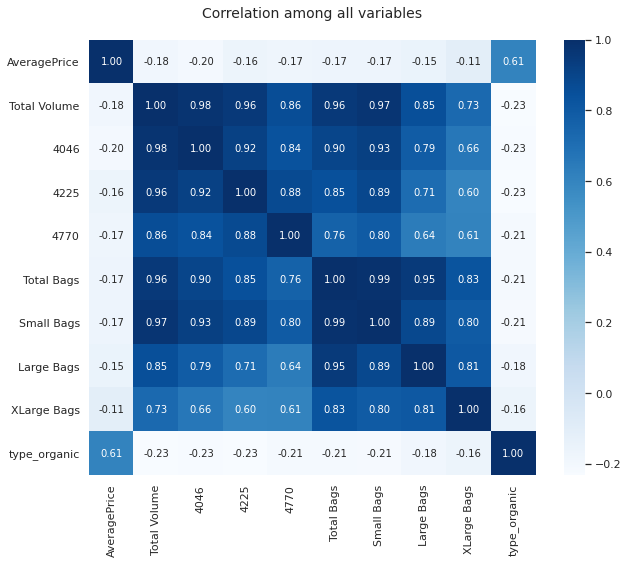

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'Blues')
plt.title('Correlation among all variables\n', fontsize = 14)
plt.show()

## Distribution of price by regions

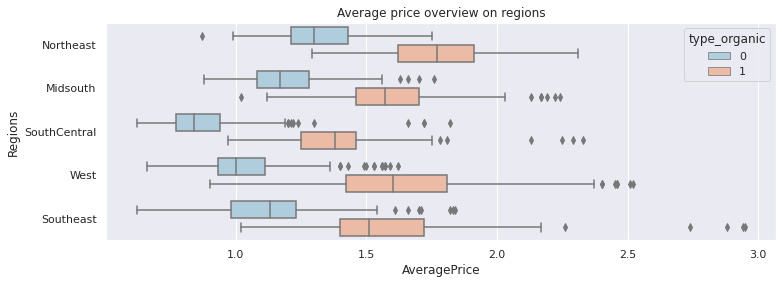

In [ ]:
plt.figure(figsize = (12, 4))
sns.boxplot(x='AveragePrice', y='region', hue='type_organic', data=df_regions, palette='RdBu_r')
plt.title('Average price overview on regions')
plt.ylabel('Regions')
plt.show()

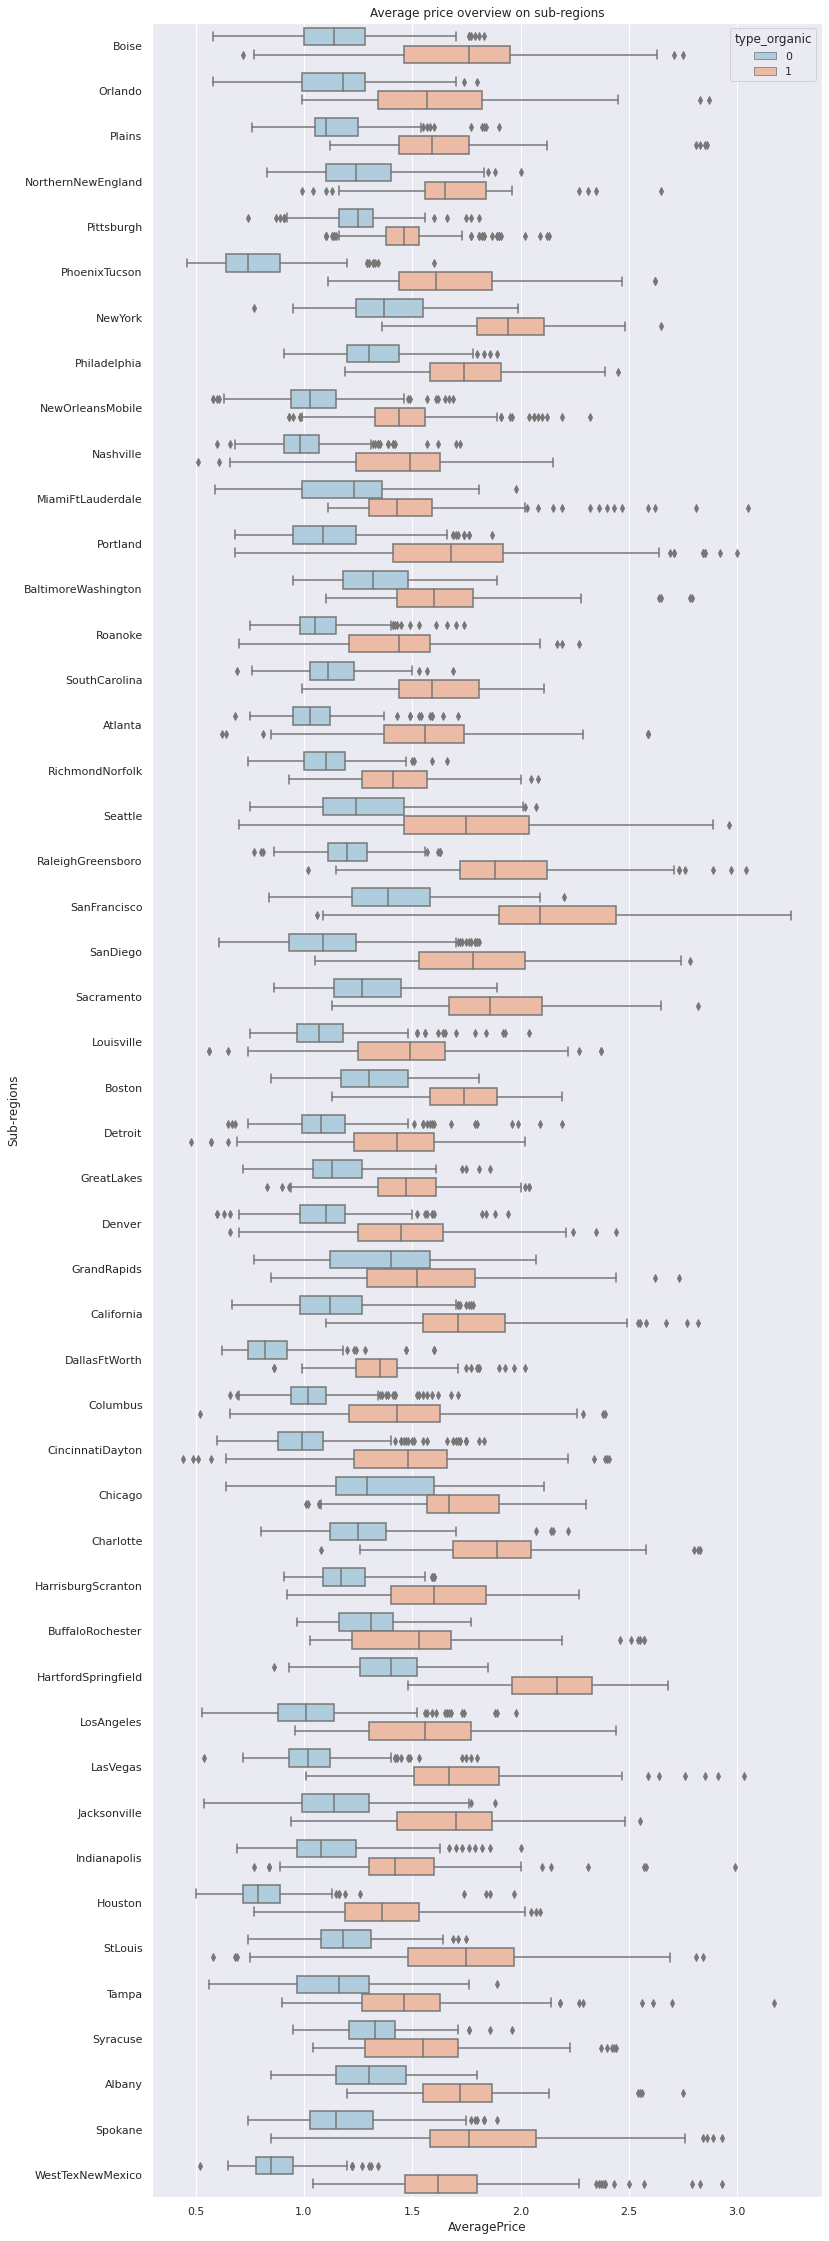

In [ ]:
plt.figure(figsize = (12, 40))
sns.boxplot(x='AveragePrice', y='region', hue='type_organic', data=df_subregions, palette='RdBu_r')
plt.title('Average price overview on sub-regions')
plt.ylabel('Sub-regions')
plt.show()

## Ploting the time series

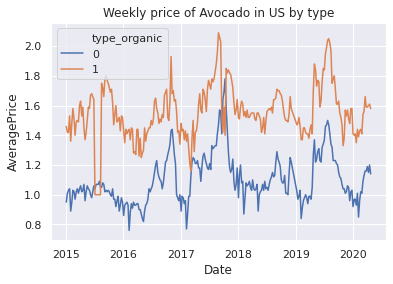

In [ ]:
sns.lineplot(x=df_US.index, y='AveragePrice', hue='type_organic', data=df_US)
plt.title('Weekly price of Avocado in US by type')
plt.legend()
plt.show()

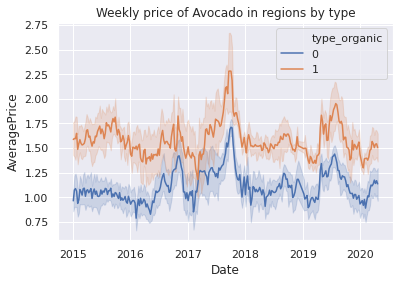

In [ ]:
sns.lineplot(x=df_regions.index, y='AveragePrice', hue='type_organic', data=df_regions)
plt.title('Weekly price of Avocado in regions by type')
plt.legend()
plt.show()

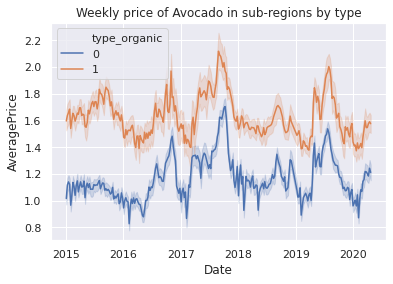

In [ ]:
sns.lineplot(x=df_subregions.index, y='AveragePrice', hue='type_organic', data=df_subregions)
plt.title('Weekly price of Avocado in sub-regions by type')
plt.legend()
plt.show()

#### Obervations:
- These time series plots look pretty similar for US, regions and sub-regions. 

- Most of the prices in the year of 2015 were in the range of $1.0 for conventional avocados. While from 2016 and onwards the density of the prices were a little bit higher.  

- Most price peaks occur for both conventional and organic avocados between the months of September and October.  

- At the end of the year there is a major price drop for both type of avocados. 

- During the year of 2017 and 2019, the avocado market experienced the highest volatility for both conventional and organic avocados.  

- For both types of Avocados, we can see that there are always a price drop at the first four/five months of each year, but then it picked up the price in the next few months before droping again at the end of each year.

## Autocorrelation check

An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other. An autocorrelation plot shows the value of the autocorrelation function (acf) on the vertical axis. It can range from –1 to 1. The horizontal axis of an autocorrelation plot shows the size of the lag between the elements of the time series. For example, the autocorrelation with lag 2 is the correlation between the time series elements and the corresponding elements that were observed two time periods earlier.

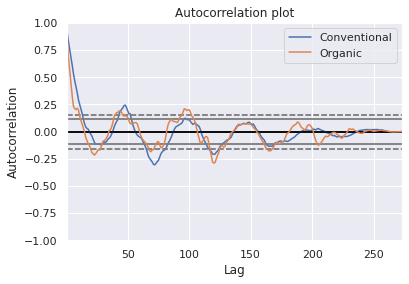

In [ ]:
df_US_conventional = df_US[df_US['type_organic']==0]
df_US_organic = df_US[df_US['type_organic']==1]

pd.plotting.autocorrelation_plot(df_US_conventional['AveragePrice'].groupby(df_US_conventional.index).mean(), label='Conventional')
pd.plotting.autocorrelation_plot(df_US_organic['AveragePrice'].groupby(df_US_organic.index).mean(), label='Organic')
plt.title('Autocorrelation plot')
plt.legend()
plt.show()

The resulting plot contains a few lines on it. The dark horizontal line at zero just denotes the zero line, the lighter full horizontal lines are the 95% confidence level and the dashed horizontal lines are 99% confidence level, which means that correlations are more significant if they occur at those levels.  
From the plot above, we can see there’s some significant correlation between t=1 and t=15 (roughly) with significant decline in correlation after that timeframe.

## Stationarity test

A series is said to be stationary if the mean, variance and covariance is constant over period of time or time invarient. To verify whether a series is stationary, we'll perform Rolling statistics check, autocorrelation check and Dicky-Fuller test.

### 1. Rolling statistics check

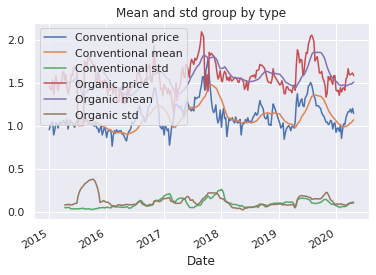

In [ ]:
df_US_conventional['AveragePrice'].groupby(df_US_conventional.index).mean().plot(label='Conventional price')
df_US_conventional['AveragePrice'].rolling(window=15).mean().plot(label='Conventional mean')
df_US_conventional['AveragePrice'].rolling(window=15).std().plot(label='Conventional std')

df_US_organic['AveragePrice'].groupby(df_US_organic.index).mean().plot(label='Organic price')
df_US_organic['AveragePrice'].rolling(window=15).mean().plot(label='Organic mean')
df_US_organic['AveragePrice'].rolling(window=15).std().plot(label='Organic std')
plt.title('Mean and std group by type')
plt.legend()
plt.show()

We can see that the mean and std is changing over time, they are not constant. So, our series is not stationary.

### 2. Autocorrelation check

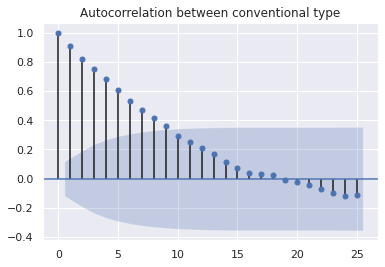

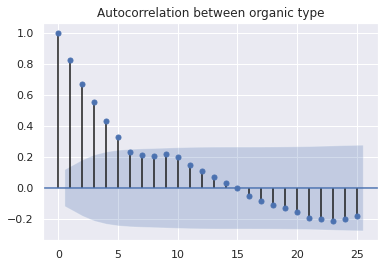

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

_ = plot_acf(df_US_conventional['AveragePrice'], title='Autocorrelation between conventional type')
_ = plot_acf(df_US_organic['AveragePrice'], title='Autocorrelation between organic type')

### 3. Dickey-Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(df, name):
    dftest = adfuller(df)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','#Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(name + ':')
    print(dfoutput)

adfuller_test(df_US_conventional['AveragePrice'], 'Conventional type')
adfuller_test(df_US_organic['AveragePrice'], '\nOrganic type')

Conventional type:
Test Statistic           -3.664730
p-value                   0.004638
#Lags Used                0.000000
#Observations Used      272.000000
Critical Value (1%)      -3.454622
Critical Value (5%)      -2.872225
Critical Value (10%)     -2.572464
dtype: float64

Organic type:
Test Statistic           -5.126548
p-value                   0.000012
#Lags Used                0.000000
#Observations Used      272.000000
Critical Value (1%)      -3.454622
Critical Value (5%)      -2.872225
Critical Value (10%)     -2.572464
dtype: float64


For both types, we can see that the p-value is greater than Critical Value (5%), so we fail to reject the null hypothesis. The series is not stationary and requires differencing.

## Transform the series into a stationary series

A non-stationary series can be made stationary by differencing. After differencing once, the series is called as integrated of order 1 and denoted by l(1).

In [ ]:
df_US_conventional_diff = df_US_conventional['AveragePrice'].diff(periods=1)[1:]
df_US_organic_diff = df_US_organic['AveragePrice'].diff(periods=1)[1:]

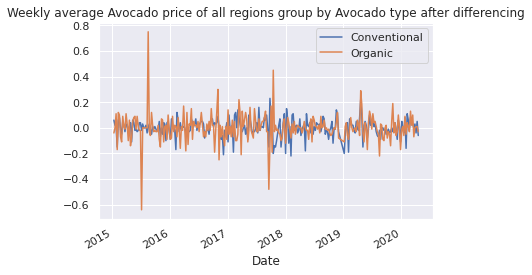

In [ ]:
df_US_conventional_diff.plot(label='Conventional')
df_US_organic_diff.plot(label='Organic')
plt.title('Weekly average Avocado price of all regions group by Avocado type after differencing')
plt.legend()
plt.show()

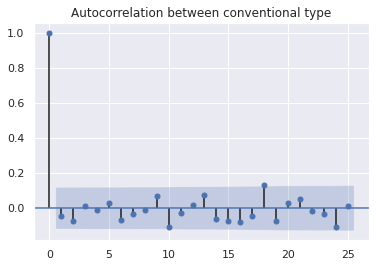

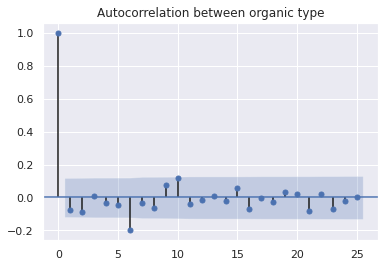

In [ ]:
_ = plot_acf(df_US_conventional_diff, title='Autocorrelation between conventional type')
_ = plot_acf(df_US_organic_diff, title='Autocorrelation between organic type')

In [ ]:
adfuller_test(df_US_conventional_diff, 'Conventional type')
adfuller_test(df_US_organic_diff, '\nOrganic type')

Conventional type:
Test Statistic         -1.717518e+01
p-value                 6.702909e-30
#Lags Used              0.000000e+00
#Observations Used      2.710000e+02
Critical Value (1%)    -3.454713e+00
Critical Value (5%)    -2.872265e+00
Critical Value (10%)   -2.572485e+00
dtype: float64

Organic type:
Test Statistic         -8.686492e+00
p-value                 4.149836e-14
#Lags Used              7.000000e+00
#Observations Used      2.640000e+02
Critical Value (1%)    -3.455365e+00
Critical Value (5%)    -2.872551e+00
Critical Value (10%)   -2.572638e+00
dtype: float64


# Create train and test data

In [ ]:
def train_test_split(df_diff, split_percentage=0.95):
    split_range = int(np.round(len(df_diff)*split_percentage))
    train = df_diff[:split_range].values
    test = df_diff[split_range:].values
    return train, test, split_range

# Apply AutoRegressive(AR) model

Yt depends only the past values.  
Yt = f(Y(t-1), Y(t-2), Y(t-3)...)  
Yt = B0 + B1*Y(t-1) + B2*Y(t-2) + ...

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

def autoregressive(train_data, start, end):
    model = AR(train_data)
    model_fitted = model.fit()
    pred = model_fitted.predict(start=start, end=end)
    print('The lag value is: %s' % model_fitted.k_ar)
    print('The coefficients of the model are:\n %s\n' % model_fitted.params)
    return pred

The lag value is: 15
The coefficients of the model are:
 [-1.35961942e-04 -1.39555618e-02 -6.95462096e-02  4.63968754e-05
 -4.23835889e-02  1.78368430e-02 -7.92208149e-02 -1.67181488e-02
 -5.06996892e-02  6.18228391e-02 -1.04828952e-01 -3.24456290e-02
 -1.02987260e-02  7.59197841e-02 -8.94376875e-02 -6.02577944e-02]

Mean Absolute Error: 0.0573255973220661
Mean Squared Error: 0.0048928389228057164
Root Mean Squared Error: 0.23942764527528165


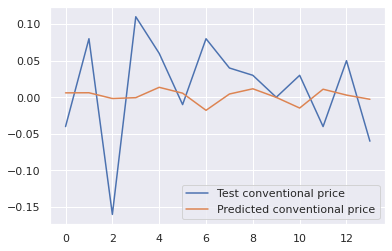

In [ ]:
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

train, test, split_range = train_test_split(df_US_conventional_diff)
pred = autoregressive(train, split_range, len(df_US_conventional)-2)

print("Mean Absolute Error:",metrics.mean_absolute_error(test, pred)) #MAE
print("Mean Squared Error:",metrics.mean_squared_error(test, pred)) #MSE
print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(test, pred))) #RMSE

plt.plot(test, label='Test conventional price')
plt.plot(pred, label='Predicted conventional price')
plt.legend()
plt.show()

The lag value is: 15
The coefficients of the model are:
 [-0.00080322 -0.1108927  -0.12208769 -0.02401982 -0.05559003 -0.09032911
 -0.2831436  -0.10980122 -0.11820477  0.05782485  0.08410712 -0.04703233
 -0.08388846 -0.03581232 -0.04964315  0.09350437]

Mean Absolute Error: 0.05786127751623815
Mean Squared Error: 0.005167608264178149
Root Mean Squared Error: 0.2405437122774947


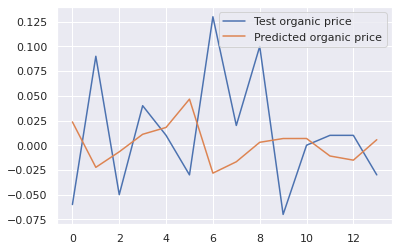

In [ ]:
train, test, split_range = train_test_split(df_US_organic_diff)
pred = autoregressive(train, split_range, len(df_US_organic)-2)

print("Mean Absolute Error:",metrics.mean_absolute_error(test, pred)) #MAE
print("Mean Squared Error:",metrics.mean_squared_error(test, pred)) #MSE
print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(test, pred))) #RMSE

plt.plot(test, label='Test organic price')
plt.plot(pred, label='Predicted organic price')
plt.legend()
plt.show()

In [ ]:
# Region wise price

errors = {}
for region in regions:
    # For region wise conventional avocado
    df_by_region_conventional = df_regions[(df_regions['type_organic']==0) & (df_regions['region']==region)]
    df_by_region_conventional_diff = df_by_region_conventional['AveragePrice'].diff(periods=1)[1:]
    
    train, test, split_range = train_test_split(df_by_region_conventional_diff)
    pred = autoregressive(train, split_range, len(df_by_region_conventional)-2)

    print("Mean Absolute Error:",metrics.mean_absolute_error(test, pred)) #MAE
    print("Mean Squared Error:",metrics.mean_squared_error(test, pred)) #MSE
    print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(test, pred))) #RMSE
    errors[f'{region}_organic'] = np.sqrt(metrics.mean_absolute_error(test, pred))
    
    # plt.plot(test, label=f'Test organic price, region: {region}')
    # plt.plot(pred, label=f'Predicted organic price, region: {region}')
    # plt.legend()
    
    # For region wise organic avocado
    df_by_region_organic = df_regions[(df_regions['type_organic']==1) & (df_regions['region']==region)]
    df_by_region_organic_diff = df_by_region_organic['AveragePrice'].diff(periods=1)[1:]
    
    train, test, split_range = train_test_split(df_by_region_organic_diff)
    pred = autoregressive(train, split_range, len(df_by_region_organic)-2)

    print("Mean Absolute Error:",metrics.mean_absolute_error(test, pred)) #MAE
    print("Mean Squared Error:",metrics.mean_squared_error(test, pred)) #MSE
    print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(test, pred))) #RMSE
    errors[f'{region}_conventional'] = np.sqrt(metrics.mean_absolute_error(test, pred))
    
    # plt.plot(test, label=f'Test organic price, region: {region}')
    # plt.plot(pred, label=f'Predicted organic price, region: {region}')
    # plt.legend()
    
print(errors)

The lag value is: 15
The coefficients of the model are:
 [ 0.00041034 -0.18653428 -0.05420007  0.0833852   0.09953233 -0.04907182
 -0.15392296 -0.02547098 -0.01884071  0.10716956 -0.00615767 -0.01579352
 -0.04244742 -0.01401463 -0.10488965 -0.04866449]

Mean Absolute Error: 0.08325725052315024
Mean Squared Error: 0.009722374109977854
Root Mean Squared Error: 0.28854332520983783
The lag value is: 15
The coefficients of the model are:
 [-0.00168456 -0.15166762 -0.26013773  0.03448109  0.06103483  0.02252743
 -0.02802107  0.01808186 -0.05693582  0.13193558  0.1260672   0.01888328
  0.01859077 -0.1178361  -0.0766719   0.06304003]

Mean Absolute Error: 0.0913199908238881
Mean Squared Error: 0.012065716845847377
Root Mean Squared Error: 0.30219197676954973
The lag value is: 15
The coefficients of the model are:
 [-0.00088509 -0.16780825 -0.21681359 -0.03512728 -0.06026574  0.00655405
 -0.01655868 -0.06884976  0.02657571  0.08994045 -0.12648987 -0.0849429
 -0.02926653  0.0518275  -0.02198778 

In [ ]:
# Sub-region wise price

errors = {}
for region in subregions:
    # For sub-region wise conventional avocado
    df_by_subregion_conventional = df_subregions[(df_subregions['type_organic']==0) & (df_subregions['region']==region)]
    df_by_subregion_conventional_diff = df_by_subregion_conventional['AveragePrice'].diff(periods=1)[1:]
    
    train, test, split_range = train_test_split(df_by_subregion_conventional_diff)
    pred = autoregressive(train, split_range, len(df_by_subregion_conventional)-2)

    print("Mean Absolute Error:",metrics.mean_absolute_error(test, pred)) #MAE
    print("Mean Squared Error:",metrics.mean_squared_error(test, pred)) #MSE
    print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(test, pred))) #RMSE
    errors[f'{region}_organic'] = np.sqrt(metrics.mean_absolute_error(test, pred))
    
    # plt.plot(test, label=f'Test organic price, region: {region}')
    # plt.plot(pred, label=f'Predicted organic price, region: {region}')
    # plt.legend()
    
    # For sub-region wise organic avocado
    df_by_subregion_organic = df_subregions[(df_subregions['type_organic']==1) & (df_subregions['region']==region)]
    df_by_subregion_organic_diff = df_by_subregion_organic['AveragePrice'].diff(periods=1)[1:]
    
    train, test, split_range = train_test_split(df_by_subregion_organic_diff)
    pred = autoregressive(train, split_range, len(df_by_subregion_organic)-2)

    print("Mean Absolute Error:",metrics.mean_absolute_error(test, pred)) #MAE
    print("Mean Squared Error:",metrics.mean_squared_error(test, pred)) #MSE
    print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(test, pred))) #RMSE
    errors[f'{region}_conventional'] = np.sqrt(metrics.mean_absolute_error(test, pred))
    
    # plt.plot(test, label=f'Test organic price, region: {region}')
    # plt.plot(pred, label=f'Predicted organic price, region: {region}')
    # plt.legend()
    
print(errors)

The lag value is: 15
The coefficients of the model are:
 [-2.55046815e-04 -3.34607537e-01 -2.47758485e-01 -7.12004954e-02
 -1.95858936e-02 -1.83900544e-02 -2.18897285e-02 -4.18472325e-02
  3.07057197e-03  7.85488194e-02  6.76728184e-02  7.69625176e-02
  1.05052717e-01 -1.48326221e-02 -1.13394518e-01 -4.87380360e-02]

Mean Absolute Error: 0.12892737982169558
Mean Squared Error: 0.01987282378641416
Root Mean Squared Error: 0.35906459004153496
The lag value is: 15
The coefficients of the model are:
 [ 0.00100254 -0.35998528 -0.41212021 -0.19309639 -0.15652802 -0.09910902
 -0.13903665 -0.00871311 -0.0507303   0.02729866  0.06080571  0.03099301
 -0.02104347  0.05144374  0.03476875  0.13079226]

Mean Absolute Error: 0.09841977416534001
Mean Squared Error: 0.015835731628865406
Root Mean Squared Error: 0.31371926011219015
The lag value is: 15
The coefficients of the model are:
 [-0.00294436 -0.63021105 -0.24283039 -0.11249331 -0.07571667 -0.16254757
 -0.09051726 -0.03096307 -0.10023982 -0.0131

# Apply ARIMA model

Three integers (p, d, q) are typically used to parametrize ARIMA models.  
- p: number of autoregressive terms (AR order)  
- d: number of nonseasonal differences (differencing order)  
- q: number of moving-average terms (MA order)  

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

def find_order(data, *param):
    try:
        model = ARIMA(data, order=param)
        model_fitted = model.fit()
        print(param, '->', model_fitted.aic)
    except Exception:
        pass

In [ ]:
import itertools
import warnings
warnings.filterwarnings('ignore')

def grid_serach(train):
    p = d = q = range(5)
    pdq = list(itertools.product(p, d, q))
    for param in pdq:
        find_order(train, *param)
    print()

In [ ]:
def arima(data, test_length, *param):
    model = ARIMA(data, order=param)
    model_fitted = model.fit()
    pred = model_fitted.forecast(steps=test_length)[0]
    return pred

In [ ]:
# Apply grid search to find the best parameters
train, test, split_range = train_test_split(df_US_conventional['AveragePrice'])
grid_serach(train)

train, test, split_range = train_test_split(df_US_organic['AveragePrice'])
grid_serach(train)

(0, 0, 0) -> -191.1527402355175
(0, 0, 1) -> -416.66411114983816
(0, 0, 2) -> -509.87241970822106
(0, 1, 0) -> -633.8924433946031
(0, 1, 1) -> -632.0825415027913
(0, 1, 2) -> -632.1113653638653
(0, 1, 3) -> -630.1133936093726
(0, 1, 4) -> -628.1239295002332
(0, 2, 0) -> -446.3841172310074
(0, 2, 1) -> -623.0593996045317
(1, 0, 0) -> -644.7792417038247
(1, 0, 1) -> -642.898266552444
(1, 0, 2) -> -641.429355345346
(1, 0, 3) -> -639.7246888771258
(1, 0, 4) -> -638.0728446186245
(1, 1, 0) -> -632.0488747854389
(1, 2, 0) -> -508.01580496094505
(1, 2, 1) -> -621.1771207819633
(1, 2, 2) -> -623.0923606408877
(1, 2, 3) -> -621.7597479760947
(1, 2, 4) -> -620.6607106413645
(2, 0, 0) -> -642.8859877919404
(2, 0, 1) -> -645.101686959722
(2, 0, 2) -> -643.1074970028999
(2, 0, 3) -> -641.2235965635873
(2, 0, 4) -> -639.2524890388615
(2, 1, 0) -> -632.085533056994
(2, 1, 1) -> -630.1042124886995
(2, 1, 2) -> -639.7216201511952
(2, 1, 3) -> -638.9851566679407
(2, 2, 0) -> -544.5716032655511
(2, 2, 1)

Mean Absolute Error: 0.08065933315662613
Mean Squared Error: 0.008801101996995749
Root Mean Squared Error: 0.28400586817287093


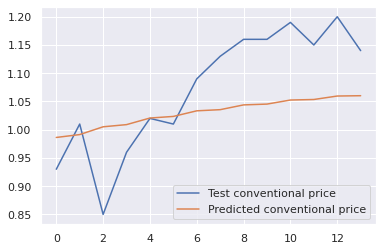

Mean Absolute Error: 0.07323690984600142
Mean Squared Error: 0.007664154368089535
Root Mean Squared Error: 0.2706231879311184


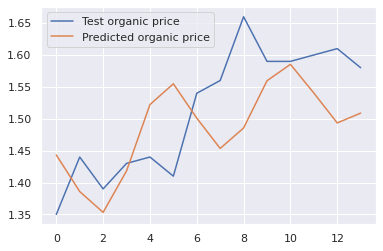

In [ ]:
# For US conventional
train, test, split_range = train_test_split(df_US_conventional['AveragePrice'])
pred_conventional = arima(train, len(test), *(2,0,1))

print("Mean Absolute Error:",metrics.mean_absolute_error(test, pred_conventional)) #MAE
print("Mean Squared Error:",metrics.mean_squared_error(test, pred_conventional)) #MSE
print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(test, pred_conventional))) #RMSE

plt.plot(test, label='Test conventional price')
plt.plot(pred_conventional, label='Predicted conventional price')
plt.legend()
plt.show()

# For US organic
train, test, split_range = train_test_split(df_US_organic['AveragePrice'])
pred_organic = arima(train, len(test), *(3,0,4))

print("Mean Absolute Error:",metrics.mean_absolute_error(test, pred_organic)) #MAE
print("Mean Squared Error:",metrics.mean_squared_error(test, pred_organic)) #MSE
print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(test, pred_organic))) #RMSE

plt.plot(test, label='Test organic price')
plt.plot(pred_organic, label='Predicted organic price')
plt.legend()
plt.show()

In [ ]:
# Apply grid search to find the best parameters for regions
for region in regions:
    print(f'Region: {region}')
    df_by_region_conventional = df_regions[(df_regions['type_organic']==0) & (df_regions['region']==region)]['AveragePrice']
    train, test, split_range = train_test_split(df_by_region_conventional)
    grid_serach(train)
    
    df_by_region_organic = df_regions[(df_regions['type_organic']==1) & (df_regions['region']==region)]['AveragePrice']
    train, test, split_range = train_test_split(df_by_region_organic)
    grid_serach(train)
    print('-'*50)

Region: West
(0, 0, 0) -> -148.16745691930038
(0, 0, 1) -> -357.4189993070663
(0, 0, 2) -> -452.48957895245894
(0, 0, 3) -> -491.9627588739445
(0, 0, 4) -> -533.122012642652
(0, 1, 0) -> -589.9644304010432
(0, 1, 1) -> -596.579269345705
(0, 1, 2) -> -594.7776134007996
(0, 1, 3) -> -595.0572211586319
(0, 1, 4) -> -593.4515281525693
(0, 2, 0) -> -368.38515974579957
(0, 2, 1) -> -579.2067224922315
(1, 0, 0) -> -601.0375432929184
(1, 0, 1) -> -603.9039997743769
(1, 0, 2) -> -601.9120641525365
(1, 0, 3) -> -604.2805082325333
(1, 0, 4) -> -604.5876522817132
(1, 1, 0) -> -595.5435784479979
(1, 1, 1) -> -594.6812058732422
(1, 2, 0) -> -457.9161022909833
(1, 2, 1) -> -584.4765219550828
(1, 2, 2) -> -583.4973108230173
(1, 2, 3) -> -588.8465956543386
(1, 2, 4) -> -582.2139811102508
(2, 0, 0) -> -603.5482311341307
(2, 0, 1) -> -601.9073026268356
(2, 0, 2) -> -607.1023738978038
(2, 0, 3) -> -603.2015854761444
(2, 0, 4) -> -602.8473912607687
(2, 1, 0) -> -595.5811923155994
(2, 1, 1) -> -593.69618072

In [ ]:
# Region wise price

errors = {}
params = {'West':[(3,0,2),(2,0,3)], 'Midsouth':[(3,0,4),(4,0,2)], 'Northeast':[(4,0,2),(2,0,3)], 'SouthCentral':[(1,0,0),(3,0,0)], 'Southeast':[(2,0,0),(1,0,1)]}

for region in regions:
    # For region wise conventional avocado[
    df_by_region_conventional = df_regions[(df_regions['type_organic']==0) & (df_regions['region']==region)]['AveragePrice']
#     df_by_region_conventional_diff = df_by_region_conventional['AveragePrice'].diff(periods=1)[1:]
    train, test, split_range = train_test_split(df_by_region_conventional)
    pred = arima(train, len(test), *params[region][0])

    print("Mean Absolute Error:",metrics.mean_absolute_error(test, pred)) #MAE
    print("Mean Squared Error:",metrics.mean_squared_error(test, pred)) #MSE
    print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(test, pred))) #RMSE
    errors[f'{region}_organic'] = np.sqrt(metrics.mean_absolute_error(test, pred))
    
    # plt.plot(test, label=f'Test organic price, region: {region}')
    # plt.plot(pred, label=f'Predicted organic price, region: {region}')
    # plt.legend()
    
    # For region wise organic avocado
    df_by_region_organic = df_regions[(df_regions['type_organic']==1) & (df_regions['region']==region)]['AveragePrice']
#     df_by_region_organic_diff = df_by_region_organic['AveragePrice'].diff(periods=1)[1:]
    train, test, split_range = train_test_split(df_by_region_organic)
    pred = arima(train, len(test), *params[region][1])

    print("Mean Absolute Error:",metrics.mean_absolute_error(test, pred)) #MAE
    print("Mean Squared Error:",metrics.mean_squared_error(test, pred)) #MSE
    print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(test, pred))) #RMSE
    errors[f'{region}_conventional'] = np.sqrt(metrics.mean_absolute_error(test, pred))
    
    # plt.plot(test, label=f'Test organic price, region: {region}')
    # plt.plot(pred, label=f'Predicted organic price, region: {region}')
    # plt.legend()
    
print(errors)

Mean Absolute Error: 0.10520763120381996
Mean Squared Error: 0.014634681825855408
Root Mean Squared Error: 0.32435725859585746
Mean Absolute Error: 0.30269878249268134
Mean Squared Error: 0.11407369281791026
Root Mean Squared Error: 0.5501806816789202
Mean Absolute Error: 0.04936385670538968
Mean Squared Error: 0.003986336347513511
Root Mean Squared Error: 0.2221797846461052
Mean Absolute Error: 0.09542895063478622
Mean Squared Error: 0.012050651332251154
Root Mean Squared Error: 0.3089157662450821
Mean Absolute Error: 0.09472929833204702
Mean Squared Error: 0.01123270465564519
Root Mean Squared Error: 0.30778125078056173
Mean Absolute Error: 0.07470772418249287
Mean Squared Error: 0.0068088540869713984
Root Mean Squared Error: 0.27332713766198347
Mean Absolute Error: 0.06471925266555252
Mean Squared Error: 0.005382660656314176
Root Mean Squared Error: 0.25439978904384436
Mean Absolute Error: 0.05108147265969649
Mean Squared Error: 0.003920985541349463
Root Mean Squared Error: 0.226012